In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib


df=pd.read_csv('subwaytime.csv', header=[0,1])

In [9]:
df2=df[df[(('호선명', 'Unnamed: 1_level_1'))].isin(["1호선","2호선","3호선","4호선","5호선","6호선","7호선"])].iloc[:,[1,3,11,13]]
df2=df2.astype({('  ',' 하차 .3'):"int64",('  ',' 하차 .4'):"int64" })

In [10]:
df2[('  ',' 하차')]=df2[('  ',' 하차 .3')]+df2[(('  ',' 하차 .4'))]

In [11]:
name_list=['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선']
x=[]
y=[]
for i in name_list :
    df3=df2[df2[('호선명', 'Unnamed: 1_level_1')]==i][[('지하철역', 'Unnamed: 3_level_1'),('  ',' 하차')]]
    index=df3[('지하철역', 'Unnamed: 3_level_1')]
    value=list(df3[('  ',' 하차')])
    df3_series=pd.Series(value,index=index)
    print(df3_series.idxmax(), df3_series.max())
    x.append(i+" "+df3_series.idxmax())
    y.append(df3_series.max())

종각 343414
역삼 448033
양재(서초구청) 308476
충무로 221021
여의도 334282
공덕 129775
가산디지털단지 481268


출근 시간대 1호선 최대 하차역 : 종각역, 하차인원 : 343,414명
출근 시간대 2호선 최대 하차역 : 역삼역, 하차인원 : 448,033명
출근 시간대 3호선 최대 하차역 : 양재(서초구청)역, 하차인원 : 308,476명
출근 시간대 4호선 최대 하차역 : 충무로역, 하차인원 : 221,021명
출근 시간대 5호선 최대 하차역 : 여의도역, 하차인원 : 334,282명
출근 시간대 6호선 최대 하차역 : 공덕역, 하차인원 : 129,775명
출근 시간대 7호선 최대 하차역 : 가산디지털단지역, 하차인원 : 481,268명


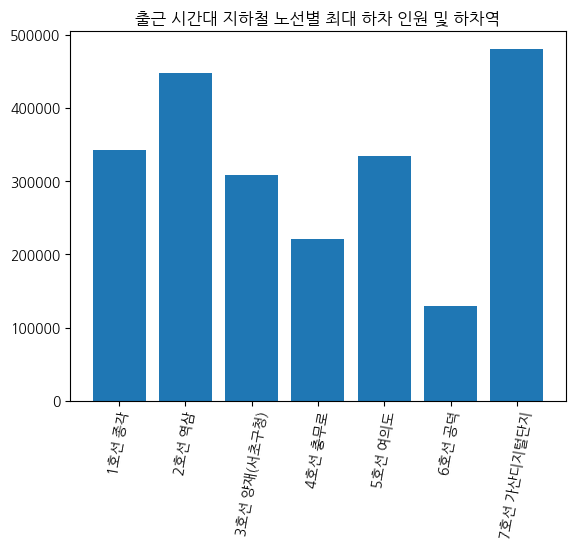

In [12]:
for i in range(1,8) : 
    x_print=x[i-1].split()[1]
    print(f"출근 시간대 {i}호선 최대 하차역 : {x_print}역, 하차인원 : {y[i-1]:,}명")


plt.bar(x,y)
plt.xticks(range(7), labels=x, rotation=80)
plt.title("출근 시간대 지하철 노선별 최대 하차 인원 및 하차역")
plt.show()

In [13]:
name_dict=dict()
for i in df[('지하철역', 'Unnamed: 3_level_1')].unique() :
    df4=df[df[('지하철역', 'Unnamed: 3_level_1')]==i].iloc[:,[3,35,37]]
    df4[('  ',' 하차')]=df4[('  ',' 하차 .15')]+df4[(('  ',' 하차 .16'))]
    name_dict.setdefault(i,df4.sum()[3])
res = dict(sorted(name_dict.items(), key=(lambda x:x[1]), reverse=True))

홍대입구 : 342,962명
잠실(송파구청) : 318,474명
신림 : 311,267명
사당 : 291,686명
서울역 : 242,371명


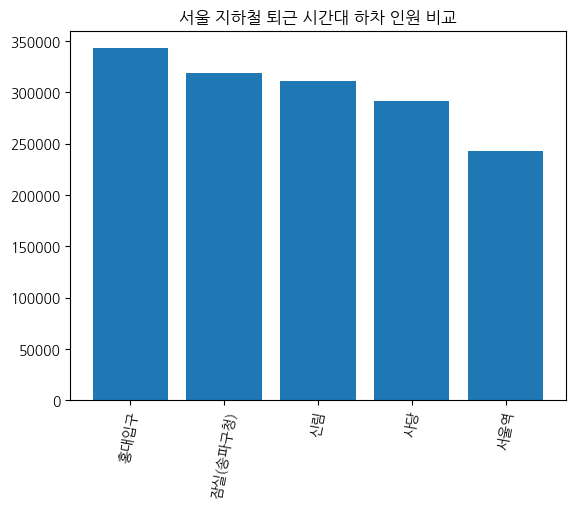

In [14]:
x=list(res.keys())
y=list(res.values())

count=5

for i in range(1,1+count) :
    print(f"{x[i-1]} : {y[i-1]:,}명")


plt.bar(x[:count],y[:count])
plt.title("서울 지하철 퇴근 시간대 하차 인원 비교")
plt.xticks(range(count), labels=x[:count], rotation=80)
plt.show()
